0.01 0.009991370664759885
0.00044721359549995795 0.007377282009736089
0.01 0.029332322676877885


/home/vandanjon/applications_locales/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:30: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/vandanjon/applications_locales/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:36: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


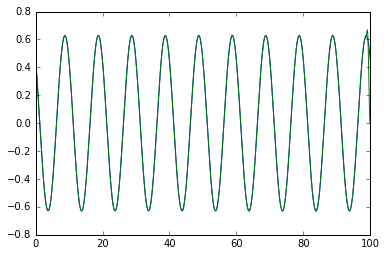

In [2]:
# -*- coding: utf-8 -*-
"""
Éditeur de Spyder

Ceci est un script temporaire.
"""
def clearall():
    all = [var for var in globals() if var[0] != "_"]
    for var in all:
        del globals()[var]
import math
import numpy as np
from scipy import signal
tech=0.001
fech=1/tech
fnyquist=fech/2
fc = 1 # on ocupe à fc Hz
tmax=100 #
gain = 1
f1 = fc/10
f2=2*fc
retard1=math.pi/4
retard2=math.pi/3
nech=np.floor(tmax/tech+1)
temps=np.linspace(0,tmax,num=nech)
signal_vrai= gain*np.sin(2*math.pi*f1*temps+retard1) 
derive_signal_vrai=2*math.pi*f1*gain*np.cos(2*math.pi*f1*temps+retard1)

gain_bruit=0.01 ;
bruit=gain_bruit*np.random.randn(nech)
signal_bruite=signal_vrai+ bruit + 0.0*gain*np.sin(2*math.pi*f2*temps+retard2)

ordre=4;
b, a = signal.butter(ordre, fc/fnyquist)
signal_filtre=signal.filtfilt(b,a, signal_bruite)
derive_signal_filtre=(signal_filtre[2:]-signal_filtre[:nech-2])/(2*tech)
bord=1
nechs=nech-2*bord+1
indice_reel=np.linspace(bord, nech-bord,num=nechs)
indice=np.array(indice_reel, int)
ts=temps[indice]
derive_signal_vrai=derive_signal_vrai[indice]


bord=3*ordre
nechs=nech-2*bord+1
indice_reel=np.linspace(bord, nech-bord,num=nechs)
indice=np.array(indice_reel, int)
t=temps[indice]
sv=signal_vrai[indice]
sb=signal_bruite[indice]
sf=signal_filtre[indice]
ts=ts[indice]
dsv=derive_signal_vrai[indice]
dsf=derive_signal_filtre[indice]



import matplotlib.pyplot as plt
#fig1 = plt.figure()
#plt.plot(t, sv,'b',t,sb,'r', t, sf, 'g')


erreur = sb-sv 
somme_carre=np.dot(erreur, erreur.T)
variance_experimentale=somme_carre/nechs
ecart_type_experimental=math.sqrt(variance_experimentale)

erreur = sf-sv 
somme_carre=np.dot(erreur, erreur.T)
variance_experimentale=somme_carre/nechs
ecart_type_experimental_filtre=math.sqrt(variance_experimentale)
print(gain_bruit, ecart_type_experimental)
print(gain_bruit*math.sqrt(2*fc/fech), ecart_type_experimental_filtre)


fig2 = plt.figure()
plt.plot(ts, dsv,'b',ts, dsf, 'g')

erreur = dsf-dsv 
somme_carre=np.dot(erreur, erreur.T)
variance_experimentale=somme_carre/nechs
ecart_type_experimental_derive=math.sqrt(variance_experimentale)
print(gain_bruit*fc,ecart_type_experimental_derive)



C'est évident, il suffit de reprendre le cours sur le filtrage et le bruit blanc en utilisant les formules des filtres... Damned !